# RIDWANULLAH IBRAHIM

### @The Spark Foundation

## Task 2: Prediction Using Unsupervised ML (K-Means Cluster Analysis)

### Predicting the optimum number of clusters and represent it visually

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# importing the dataset
dataset = pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Spliting the dataset into dependent (Y) and independent (X) variables
#### Here, there is only independent variable and no dependent variable, that is why it is Unsupervised

In [41]:
X = dataset.iloc[:, [1,2,3,4]].values     # independent variables

#### Findind the optimum number of cluster for k-means classification

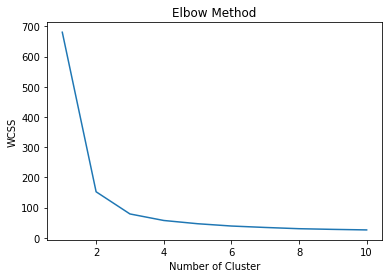

In [42]:
# Elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

### From the graph, we have our first massive change to be equals 2, and the second massive change to be 3. After our second massive change, we do not have another change along the x-axis. 
### Therefore our optimum value of K is equals 3.

#### Now, I want to determine the cluster for each data point

In [45]:
# Fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

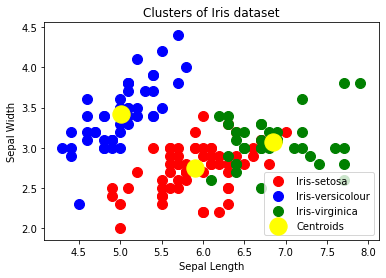

In [52]:
# visualizing the cluster considering the first two columns of the independent variables
plt.scatter(X[Y_kmeans==0,0], X[Y_kmeans==0,1], s=100, c='red', label='Iris-setosa')
plt.scatter(X[Y_kmeans==1,0], X[Y_kmeans==1,1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(X[Y_kmeans==2,0], X[Y_kmeans==2,1], s=100, c='green', label='Iris-virginica')
#centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Iris dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()



### Analyzing the visualization

#### The sepal length of Iris-setosa (RED cluster) is twice of its sepal length
#### The sepal length of Iris-versicolour (GREEN cluster) is greater than its sepal width
#### The sepal length of Iris-virginica (BLUE cluster) is almost the same with its sepal width

## This ends the K-Means Cluster Analysis